# Survey Text Preferences: Exploring Tone Patterns

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_excel('final_data.xlsx')
df.head(2)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive


In [3]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [4]:
df.shape

(50, 19)

In [5]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')
(50, 19)
na value count 2


In [6]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())
print(df.dtypes)

age               0
gender            0
ethnicity         0
race              2
education         0
marital_status    0
income            0
employment        0
language          0
disability        0
states            0
sample_1          0
sample_2          0
sample_3          0
sample_4          0
sample_5          0
sample_6          0
sample_7          0
sample_8          0
dtype: int64
age               object
gender            object
ethnicity         object
race              object
education         object
marital_status    object
income            object
employment        object
language          object
disability        object
states            object
sample_1          object
sample_2          object
sample_3          object
sample_4          object
sample_5          object
sample_6          object
sample_7          object
sample_8          object
dtype: object


In [7]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                      var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
final_data.head(12)


,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,choice
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,Persuasive
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,Original
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,Original
3,25-34,female,hispanic,na,Associate,single,"Less than $25,000",Employed Part time,both,i do not have a disability,Empathetic
4,18-24,male,hispanic,native american,Bachelor,single,"$25,000 - $49,999",Student,both,na,Empathetic
5,25-34,female,non hispanic,white,Master,married,"$50,000 - $74,999",Employed Part time,english,i do not have a disability,Original
6,18-24,female,hispanic,white,Associate,single,na,Student,both,i do not have a disability,Empathetic
7,25-34,non binary,hispanic,Puerto Rican,Associate,divorced,"$50,000 - $74,999",Employed Part time,both,na,Original
8,25-34,female,hispanic,na,Bachelor,single,"Less than $25,000",Student,both,i do not have a disability,Original
9,25-34,female,hispanic,NaN,Associate,single,"$100,000 - $149,999",Student,both,i do not have a disability,Empathetic


In [8]:
final_data.shape

(400, 11)

In [9]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
def disability_status(disability_status):
    if disability_status.lower() == "i do not have a disability":
        return "no disability"
    elif disability_status.lower() == "i have a disability":
        return "has disability"
    elif disability_status.lower() == "na":
        return "undisclosed"
    else:
        return disability_status
    

In [10]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(disability_status)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [11]:
# Creating interaction variable: 'Gender-Marital Status'
final_data['Gender-Marital Status'] = final_data['gender'] + '-' + final_data['marital_status']

In [12]:
final_data.drop(['gender', 'marital_status'], axis=1, inplace=True)

In [13]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

In [14]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)

In [15]:
final_data.shape

(400, 10)

In [16]:
final_data.head(3)

,age,ethnicity,race,education,income,employment,language,disability,choice,Gender-Marital Status
0,3,non hispanic,native american,High School,1,Employed Part time,both,no disability,Persuasive,female-undisclosed
1,0,hispanic,white,High School,0,Employed Part time,english,no disability,Original,male-single
2,1,non hispanic,multiracial,Associate,0,Student,english,no disability,Original,female-single


In [17]:
encoded_data = pd.get_dummies(final_data, drop_first=True)

In [18]:
encoded_data.shape

(400, 39)

In [19]:
encoded_data

,age,income,ethnicity_non hispanic,race_Mexican,race_Puerto Rican,race_asian,race_black,race_multiracial,race_native american,race_undisclosed,...,Gender-Marital Status_female-married,Gender-Marital Status_female-separated,Gender-Marital Status_female-single,Gender-Marital Status_female-undisclosed,Gender-Marital Status_female-widowed,Gender-Marital Status_male-divorced,Gender-Marital Status_male-married,Gender-Marital Status_male-single,Gender-Marital Status_male-widowed,Gender-Marital Status_non binary-divorced
0,3,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
396,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
397,1,-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
398,1,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
encoded_data.columns

Index(['age', 'income', 'ethnicity_non hispanic', 'race_Mexican',
       'race_Puerto Rican ', 'race_asian', 'race_black', 'race_multiracial',
       'race_native american', 'race_undisclosed', 'race_white',
       'education_Bachelor', 'education_Doctorate', 'education_High School',
       'education_Master', 'education_less than high school',
       'education_undisclosed', 'employment_Employed Part time',
       'employment_Retired', 'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'language_english', 'language_spanish',
       'language_undisclosed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier',
       'Gender-Marital Status_female-married',
       'Gender-Marital Status_female-separated',
       'Gender-Marital Status_female-single',
       'Gender-Marital Status_female-undisclosed',
       'Gender-Marital Status_female-widowed',
       'Gender-Marital Status_male-divorced',
       'Gender-Marital Statu

## Model Training

In [21]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.21885473304852116


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.23476512241709657


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.18894374951399664


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.16480591470588174


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.14867912336557823


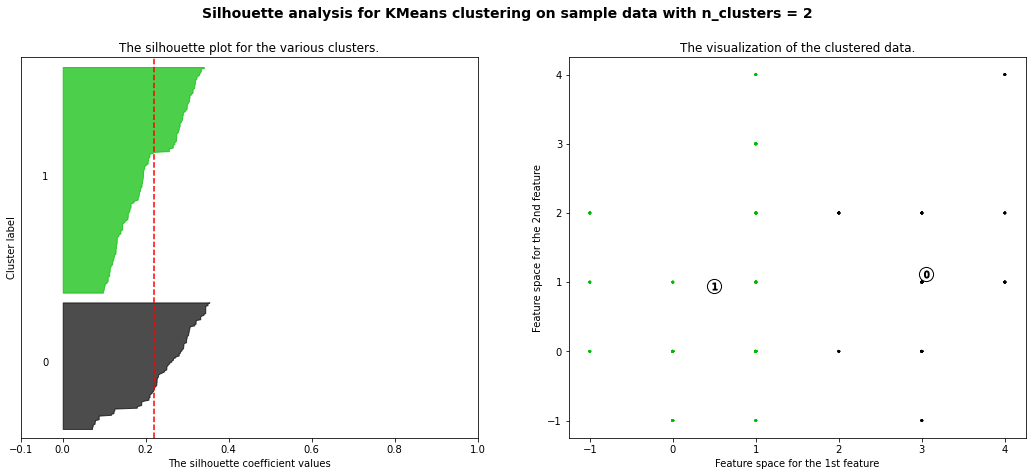

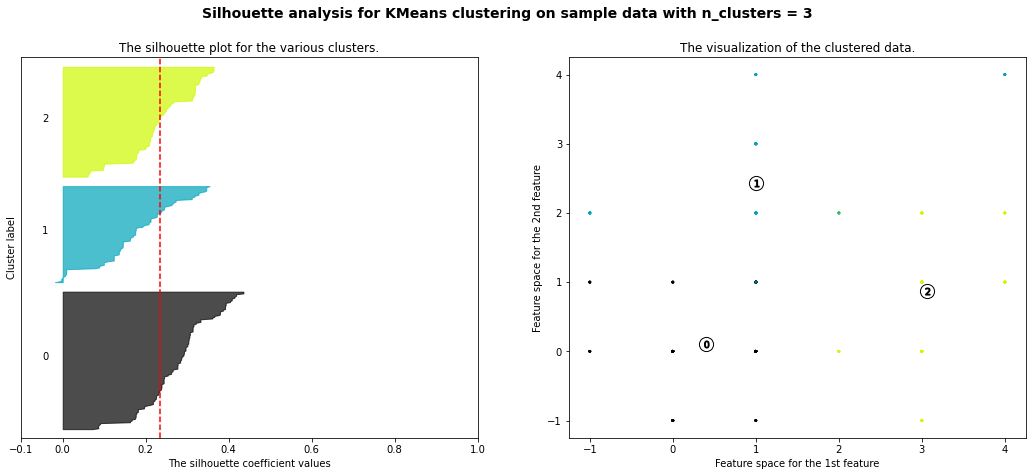

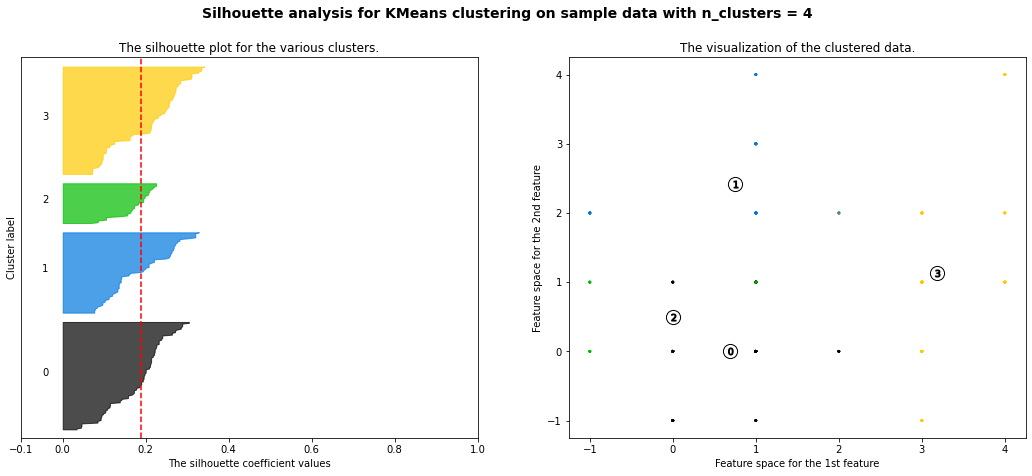

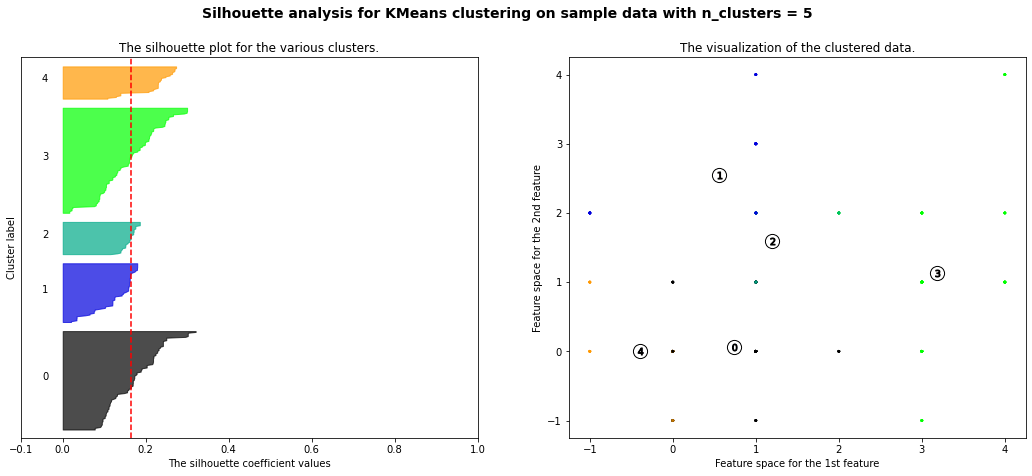

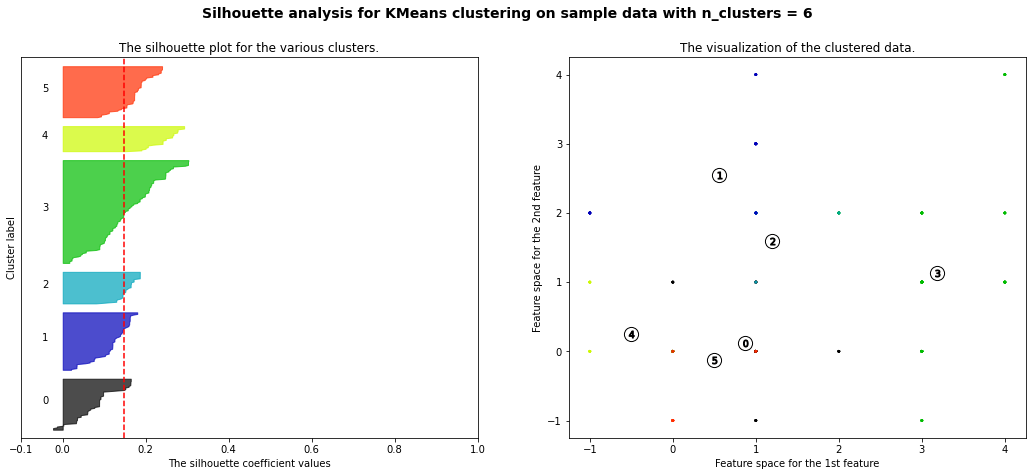

In [22]:
X = encoded_data.values  
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()